In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. log_data 전처리

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
log_raw = pd.read_csv('/content/drive/MyDrive/2022BigCon/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/log_data.csv')          # 핀다 앱 로그 정보

In [ ]:
user_spec = pd.read_csv('/content/drive/MyDrive/2022BigCon/제출파일/1013_train_final.csv')    # user_spec train

In [ ]:
log = log_raw.copy()

In [ ]:
log.shape

(17843993, 6)

In [ ]:
log.sort_values(['user_id','timestamp']).head(50)

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
11709372,1,GetCreditInfo,2022-05-03 14:52:28,android,464,2022-05-03
11709374,1,GetCreditInfo,2022-05-03 14:52:35,android,464,2022-05-03
2451691,1,UseLoanManage,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
2451693,1,Login,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
7071607,1,GetCreditInfo,2022-06-16 23:58:42,android,464,2022-06-16
10428909,7,GetCreditInfo,2022-05-22 16:39:49,android,465,2022-05-22
9627339,9,GetCreditInfo,2022-05-21 23:37:58,android,465,2022-05-21
9627368,9,GetCreditInfo,2022-05-21 23:43:33,android,465,2022-05-21
9627370,9,GetCreditInfo,2022-05-21 23:43:52,android,465,2022-05-21
9505105,11,OpenApp,2022-03-24 10:53:59,iOS,3.6.1,2022-03-24


In [ ]:
log.head()

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


## 1-1. log o / user o

In [ ]:
aa = set(user_spec['user_id'].unique())

In [ ]:
bb = set(log['user_id'].unique())

In [ ]:
intersection = aa & bb

In [ ]:
intersection = list(intersection)    #loan + spec 에 존재하는 user

In [ ]:
len(intersection)

240101

In [ ]:
# loan + spec 에 존재하는 user만 log_result 추출 :: log2
# user spec o / log o:: log2
log2 = log.loc[log['user_id'].isin(intersection)].sort_values(['user_id','timestamp'])

In [ ]:
log2

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
9627339,9,GetCreditInfo,2022-05-21 23:37:58,android,465,2022-05-21
9627368,9,GetCreditInfo,2022-05-21 23:43:33,android,465,2022-05-21
9627370,9,GetCreditInfo,2022-05-21 23:43:52,android,465,2022-05-21
9505105,11,OpenApp,2022-03-24 10:53:59,iOS,3.6.1,2022-03-24
13238918,11,GetCreditInfo,2022-03-24 10:54:07,iOS,3.6.1,2022-03-24
...,...,...,...,...,...,...
7298668,879696,OpenApp,2022-03-14 05:37:32,Android,3.8.2,2022-03-14
7298669,879696,Login,2022-03-14 05:37:39,Android,3.8.2,2022-03-14
7298670,879696,ViewLoanApplyIntro,2022-03-14 05:37:55,Android,3.8.2,2022-03-14
7298671,879696,CompleteIDCertification,2022-03-14 05:38:16,Android,3.8.2,2022-03-14


###  1) 앱 사용시간 구하기
- insert_time	앞에 있는 값을 기준으로 누적

In [ ]:
time_max = user_spec.groupby('application_id',as_index=False).agg(insert_max=('insert_time','max'))

In [ ]:
time_max    # application_id 별 insert_time 최댓값 구하기
            # 이 시간 위에 있는 값들을 더해야 함

,application_id,insert_max
0,1,2022-05-06 11:05:42
1,2,2022-04-13 10:57:03
2,6,2022-04-26 02:02:44
3,14,2022-04-15 01:02:52
4,17,2022-04-07 08:13:41
...,...,...
728857,2167811,2022-04-11 14:49:23
728858,2167817,2022-04-02 10:10:31
728859,2167819,2022-03-07 10:50:59
728860,2167820,2022-03-17 08:59:26


In [ ]:
AA = user_spec[['application_id','user_id']].drop_duplicates()    # application_id / user_id matching
AA

,application_id,user_id
0,2157865,346970.0
1,576643,545882.0
3,2136706,558819.0
43,380021,341662.0
95,949973,17957.0
...,...,...
10264294,78165,172344.0
10264314,1544318,815960.0
10264316,950669,3625.0
10264321,158037,52722.0


In [ ]:
time_max = pd.merge(time_max, AA, how='left')

In [ ]:
time_max

,application_id,insert_max,user_id
0,1,2022-05-06 11:05:42,777860.0
1,2,2022-04-13 10:57:03,28169.0
2,6,2022-04-26 02:02:44,59078.0
3,14,2022-04-15 01:02:52,623310.0
4,17,2022-04-07 08:13:41,822111.0
...,...,...,...
728857,2167811,2022-04-11 14:49:23,661020.0
728858,2167817,2022-04-02 10:10:31,314169.0
728859,2167819,2022-03-07 10:50:59,210537.0
728860,2167820,2022-03-17 08:59:26,781452.0


In [ ]:
result = []
for i in range(len(time_max)):
    aa = time_max['insert_max'][i][0:10]
    result.append(aa)

In [ ]:
time_max['loanapply_date']=result

In [ ]:
time_max.sort_values('user_id')

,application_id,insert_max,user_id,loanapply_date
83602,248576,2022-05-21 23:41:09,9.0,2022-05-21
588683,1751522,2022-04-20 10:11:03,11.0,2022-04-20
396874,1180616,2022-03-24 10:58:22,11.0,2022-03-24
507187,1508745,2022-04-18 14:37:09,14.0,2022-04-18
669141,1990215,2022-03-06 10:46:59,17.0,2022-03-06
...,...,...,...,...
140752,419225,2022-05-13 11:33:04,879693.0,2022-05-13
596488,1774704,2022-05-27 12:50:55,879695.0,2022-05-27
722826,2149910,2022-03-14 05:23:30,879696.0,2022-03-14
624255,1856758,2022-03-14 05:40:38,879696.0,2022-03-14


In [ ]:
log2

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
9627339,9,GetCreditInfo,2022-05-21 23:37:58,android,465,2022-05-21
9627368,9,GetCreditInfo,2022-05-21 23:43:33,android,465,2022-05-21
9627370,9,GetCreditInfo,2022-05-21 23:43:52,android,465,2022-05-21
9505105,11,OpenApp,2022-03-24 10:53:59,iOS,3.6.1,2022-03-24
13238918,11,GetCreditInfo,2022-03-24 10:54:07,iOS,3.6.1,2022-03-24
...,...,...,...,...,...,...
7298668,879696,OpenApp,2022-03-14 05:37:32,Android,3.8.2,2022-03-14
7298669,879696,Login,2022-03-14 05:37:39,Android,3.8.2,2022-03-14
7298670,879696,ViewLoanApplyIntro,2022-03-14 05:37:55,Android,3.8.2,2022-03-14
7298671,879696,CompleteIDCertification,2022-03-14 05:38:16,Android,3.8.2,2022-03-14


In [ ]:
log3 = pd.merge(log2, time_max, how='left', left_on=['user_id','date_cd'], right_on=['user_id','loanapply_date'])
log3

,user_id,event,timestamp,mp_os,mp_app_version,date_cd,application_id,insert_max,loanapply_date
0,9,GetCreditInfo,2022-05-21 23:37:58,android,465,2022-05-21,248576.0,2022-05-21 23:41:09,2022-05-21
1,9,GetCreditInfo,2022-05-21 23:43:33,android,465,2022-05-21,248576.0,2022-05-21 23:41:09,2022-05-21
2,9,GetCreditInfo,2022-05-21 23:43:52,android,465,2022-05-21,248576.0,2022-05-21 23:41:09,2022-05-21
3,11,OpenApp,2022-03-24 10:53:59,iOS,3.6.1,2022-03-24,1180616.0,2022-03-24 10:58:22,2022-03-24
4,11,GetCreditInfo,2022-03-24 10:54:07,iOS,3.6.1,2022-03-24,1180616.0,2022-03-24 10:58:22,2022-03-24
...,...,...,...,...,...,...,...,...,...
14763237,879696,ViewLoanApplyIntro,2022-03-14 05:37:55,Android,3.8.2,2022-03-14,2149910.0,2022-03-14 05:23:30,2022-03-14
14763238,879696,CompleteIDCertification,2022-03-14 05:38:16,Android,3.8.2,2022-03-14,1856758.0,2022-03-14 05:40:38,2022-03-14
14763239,879696,CompleteIDCertification,2022-03-14 05:38:16,Android,3.8.2,2022-03-14,2149910.0,2022-03-14 05:23:30,2022-03-14
14763240,879696,EndLoanApply,2022-03-14 05:42:14,Android,3.8.2,2022-03-14,1856758.0,2022-03-14 05:40:38,2022-03-14


In [ ]:
log4 = log3.loc[log3['timestamp'] <= log3['insert_max']]
log4

,user_id,event,timestamp,mp_os,mp_app_version,date_cd,application_id,insert_max,loanapply_date
0,9,GetCreditInfo,2022-05-21 23:37:58,android,465,2022-05-21,248576.0,2022-05-21 23:41:09,2022-05-21
3,11,OpenApp,2022-03-24 10:53:59,iOS,3.6.1,2022-03-24,1180616.0,2022-03-24 10:58:22,2022-03-24
4,11,GetCreditInfo,2022-03-24 10:54:07,iOS,3.6.1,2022-03-24,1180616.0,2022-03-24 10:58:22,2022-03-24
5,11,UseLoanManage,2022-03-24 10:54:08,iOS,3.6.1,2022-03-24,1180616.0,2022-03-24 10:58:22,2022-03-24
6,11,GetCreditInfo,2022-03-24 10:54:19,iOS,3.6.1,2022-03-24,1180616.0,2022-03-24 10:58:22,2022-03-24
...,...,...,...,...,...,...,...,...,...
14763230,879696,GetCreditInfo,2022-03-14 05:37:22,android,449,2022-03-14,1856758.0,2022-03-14 05:40:38,2022-03-14
14763232,879696,OpenApp,2022-03-14 05:37:32,Android,3.8.2,2022-03-14,1856758.0,2022-03-14 05:40:38,2022-03-14
14763234,879696,Login,2022-03-14 05:37:39,Android,3.8.2,2022-03-14,1856758.0,2022-03-14 05:40:38,2022-03-14
14763236,879696,ViewLoanApplyIntro,2022-03-14 05:37:55,Android,3.8.2,2022-03-14,1856758.0,2022-03-14 05:40:38,2022-03-14


In [ ]:
import datetime as dt

In [ ]:
log4['timestamp']=pd.to_datetime(log4['timestamp'])

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13484\4044181468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log4['timestamp']=pd.to_datetime(log4['timestamp'])


In [ ]:
log4['insert_max']=pd.to_datetime(log4['insert_max'])

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13484\566070958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log4['insert_max']=pd.to_datetime(log4['insert_max'])


In [ ]:
log5 = log4[['user_id','timestamp','date_cd','application_id','insert_max']]
log5

,user_id,timestamp,date_cd,application_id,insert_max
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22
...,...,...,...,...,...
14763230,879696,2022-03-14 05:37:22,2022-03-14,1856758.0,2022-03-14 05:40:38
14763232,879696,2022-03-14 05:37:32,2022-03-14,1856758.0,2022-03-14 05:40:38
14763234,879696,2022-03-14 05:37:39,2022-03-14,1856758.0,2022-03-14 05:40:38
14763236,879696,2022-03-14 05:37:55,2022-03-14,1856758.0,2022-03-14 05:40:38


In [ ]:
log5 = log5.sort_values(['user_id','application_id','timestamp'])    # user_id','application_id : sort 꼭 필요

In [ ]:
log5

,user_id,timestamp,date_cd,application_id,insert_max
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22
...,...,...,...,...,...
14763230,879696,2022-03-14 05:37:22,2022-03-14,1856758.0,2022-03-14 05:40:38
14763232,879696,2022-03-14 05:37:32,2022-03-14,1856758.0,2022-03-14 05:40:38
14763234,879696,2022-03-14 05:37:39,2022-03-14,1856758.0,2022-03-14 05:40:38
14763236,879696,2022-03-14 05:37:55,2022-03-14,1856758.0,2022-03-14 05:40:38


In [ ]:
log5 = log5.drop_duplicates()    # 겹치는 행 제거

In [ ]:
log5

,user_id,timestamp,date_cd,application_id,insert_max
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22
...,...,...,...,...,...
14763230,879696,2022-03-14 05:37:22,2022-03-14,1856758.0,2022-03-14 05:40:38
14763232,879696,2022-03-14 05:37:32,2022-03-14,1856758.0,2022-03-14 05:40:38
14763234,879696,2022-03-14 05:37:39,2022-03-14,1856758.0,2022-03-14 05:40:38
14763236,879696,2022-03-14 05:37:55,2022-03-14,1856758.0,2022-03-14 05:40:38


In [ ]:
log5['diff']=log5['timestamp'].diff() / np.timedelta64(1, 's') 

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13484\1610334476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log5['diff']=log5['timestamp'].diff() / np.timedelta64(1, 's')


In [ ]:
log5['diff']=log5['diff'].shift(-1)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13484\49260735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log5['diff']=log5['diff'].shift(-1)


In [ ]:
log5

,user_id,timestamp,date_cd,application_id,insert_max,diff
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09,-5057039.0
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22,8.0
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22,1.0
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22,11.0
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22,17.0
...,...,...,...,...,...,...
14763230,879696,2022-03-14 05:37:22,2022-03-14,1856758.0,2022-03-14 05:40:38,10.0
14763232,879696,2022-03-14 05:37:32,2022-03-14,1856758.0,2022-03-14 05:40:38,7.0
14763234,879696,2022-03-14 05:37:39,2022-03-14,1856758.0,2022-03-14 05:40:38,16.0
14763236,879696,2022-03-14 05:37:55,2022-03-14,1856758.0,2022-03-14 05:40:38,21.0


In [ ]:
pd.options.display.max_rows = 1000

In [ ]:
log5.head(200)

,user_id,timestamp,date_cd,application_id,insert_max,diff
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09,-5057039.0
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22,8.0
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22,1.0
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22,11.0
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22,17.0
7,11,2022-03-24 10:54:36,2022-03-24,1180616.0,2022-03-24 10:58:22,67.0
8,11,2022-03-24 10:55:43,2022-03-24,1180616.0,2022-03-24 10:58:22,43.0
10,11,2022-03-24 10:56:26,2022-03-24,1180616.0,2022-03-24 10:58:22,2329664.0
15,11,2022-04-20 10:04:10,2022-04-20,1751522.0,2022-04-20 10:11:03,6.0
16,11,2022-04-20 10:04:16,2022-04-20,1751522.0,2022-04-20 10:11:03,1.0


- diff 가 잘못들어간 행 (application_id 바뀌면서 잘못들어간 행)
    1. 음수인 경우
    2. 양수인데 비정상적으로 큰 경우 &rarr; 이 경우 어떻게 정의할지?
    3. (참고) diff=0 인 경우는 그냥 둬도 됨! (문제 없음)

In [ ]:
# 1. diff 음수인 경우 : insert_max - timestamp 값으로 대체
log5.query('diff<0')

,user_id,timestamp,date_cd,application_id,insert_max,diff
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09,-5057039.0
19,11,2022-04-20 10:09:37,2022-04-20,1751522.0,2022-04-20 10:11:03,-3885908.0
112,20,2022-03-18 16:14:44,2022-03-18,701764.0,2022-03-18 16:15:01,-347819.0
118,20,2022-03-22 20:29:36,2022-03-22,970122.0,2022-03-22 20:29:56,-491811.0
139,24,2022-05-16 09:28:13,2022-05-16,146634.0,2022-05-16 09:28:48,-227112.0
...,...,...,...,...,...,...
14763071,879691,2022-03-11 15:57:08,2022-03-11,1019727.0,2022-03-11 15:58:12,-90642.0
14763062,879691,2022-03-10 21:50:06,2022-03-10,1223969.0,2022-03-10 21:52:16,-627459.0
14763135,879692,2022-04-22 10:46:40,2022-04-22,509332.0,2022-04-22 10:46:53,-323057.0
14763188,879693,2022-05-20 16:31:43,2022-05-20,716861.0,2022-05-20 16:33:03,-280798.0


In [ ]:
log5['diff1'] = np.where(log5['diff']<0, (log5['insert_max']-log5['timestamp']).values / np.timedelta64(1, 's') , log5['diff'])

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13484\1475750659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log5['diff1'] = np.where(log5['diff']<0, (log5['insert_max']-log5['timestamp']).values / np.timedelta64(1, 's') , log5['diff'])


In [ ]:
log5.head(200)

,user_id,timestamp,date_cd,application_id,insert_max,diff,diff1
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09,-5057039.0,191.0
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22,8.0,8.0
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22,1.0,1.0
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22,11.0,11.0
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22,17.0,17.0
7,11,2022-03-24 10:54:36,2022-03-24,1180616.0,2022-03-24 10:58:22,67.0,67.0
8,11,2022-03-24 10:55:43,2022-03-24,1180616.0,2022-03-24 10:58:22,43.0,43.0
10,11,2022-03-24 10:56:26,2022-03-24,1180616.0,2022-03-24 10:58:22,2329664.0,2329664.0
15,11,2022-04-20 10:04:10,2022-04-20,1751522.0,2022-04-20 10:11:03,6.0,6.0
16,11,2022-04-20 10:04:16,2022-04-20,1751522.0,2022-04-20 10:11:03,1.0,1.0


In [ ]:
# 2. 양수인데 비정상적으로 큰 경우 → 이 경우 어떻게 정의할지? 
## 하루를 기준으로 잡았다가, index 76 처리 안돼서 #index 76으로 기준 잡음 
## -> 완료
log5['diff2'] = np.where(log5['diff1']>=74107, (log5['insert_max']-log5['timestamp']).values / np.timedelta64(1, 's') , log5['diff1'])

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13484\3467985691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log5['diff2'] = np.where(log5['diff1']>=74107, (log5['insert_max']-log5['timestamp']).values / np.timedelta64(1, 's') , log5['diff1'])


In [ ]:
log5.head(200)

,user_id,timestamp,date_cd,application_id,insert_max,diff,diff1,diff2
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09,-5057039.0,191.0,191.0
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22,8.0,8.0,8.0
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22,1.0,1.0,1.0
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22,11.0,11.0,11.0
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22,17.0,17.0,17.0
7,11,2022-03-24 10:54:36,2022-03-24,1180616.0,2022-03-24 10:58:22,67.0,67.0,67.0
8,11,2022-03-24 10:55:43,2022-03-24,1180616.0,2022-03-24 10:58:22,43.0,43.0,43.0
10,11,2022-03-24 10:56:26,2022-03-24,1180616.0,2022-03-24 10:58:22,2329664.0,2329664.0,116.0
15,11,2022-04-20 10:04:10,2022-04-20,1751522.0,2022-04-20 10:11:03,6.0,6.0,6.0
16,11,2022-04-20 10:04:16,2022-04-20,1751522.0,2022-04-20 10:11:03,1.0,1.0,1.0


In [ ]:
log5['diff2'].max()    # application_id가 달라져서 크게 나온 값이 아님. -> 완료

85734.0

In [ ]:
log5.query('diff2==85734')

,user_id,timestamp,date_cd,application_id,insert_max,diff,diff1,diff2
8653964,513898,2022-03-17 00:01:05,2022-03-17,2025117.0,2022-03-17 23:49:59,85658.0,85658.0,85734.0


In [ ]:
log5.query('user_id==513898')    

,user_id,timestamp,date_cd,application_id,insert_max,diff,diff1,diff2
8654149,513898,2022-05-09 16:23:59,2022-05-09,8898.0,2022-05-09 19:33:33,3721.0,3721.0,3721.0
8654150,513898,2022-05-09 17:26:00,2022-05-09,8898.0,2022-05-09 19:33:33,3.0,3.0,3.0
8654151,513898,2022-05-09 17:26:03,2022-05-09,8898.0,2022-05-09 19:33:33,1.0,1.0,1.0
8654152,513898,2022-05-09 17:26:04,2022-05-09,8898.0,2022-05-09 19:33:33,3.0,3.0,3.0
8654153,513898,2022-05-09 17:26:07,2022-05-09,8898.0,2022-05-09 19:33:33,288.0,288.0,288.0
8654154,513898,2022-05-09 17:30:55,2022-05-09,8898.0,2022-05-09 19:33:33,220.0,220.0,220.0
8654155,513898,2022-05-09 17:34:35,2022-05-09,8898.0,2022-05-09 19:33:33,7036.0,7036.0,7036.0
8654156,513898,2022-05-09 19:31:51,2022-05-09,8898.0,2022-05-09 19:33:33,4.0,4.0,4.0
8654157,513898,2022-05-09 19:31:55,2022-05-09,8898.0,2022-05-09 19:33:33,3.0,3.0,3.0
8654158,513898,2022-05-09 19:31:58,2022-05-09,8898.0,2022-05-09 19:33:33,4.0,4.0,4.0


In [ ]:
## 3. diff2 몇 이상일때 활동 안했다고 정의할건지? 
## 일단 1시간(3600초) 기준으로

In [ ]:
log5.head(200)

,user_id,timestamp,date_cd,application_id,insert_max,diff,diff1,diff2
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09,-5057039.0,191.0,191.0
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22,8.0,8.0,8.0
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22,1.0,1.0,1.0
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22,11.0,11.0,11.0
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22,17.0,17.0,17.0
7,11,2022-03-24 10:54:36,2022-03-24,1180616.0,2022-03-24 10:58:22,67.0,67.0,67.0
8,11,2022-03-24 10:55:43,2022-03-24,1180616.0,2022-03-24 10:58:22,43.0,43.0,43.0
10,11,2022-03-24 10:56:26,2022-03-24,1180616.0,2022-03-24 10:58:22,2329664.0,2329664.0,116.0
15,11,2022-04-20 10:04:10,2022-04-20,1751522.0,2022-04-20 10:11:03,6.0,6.0,6.0
16,11,2022-04-20 10:04:16,2022-04-20,1751522.0,2022-04-20 10:11:03,1.0,1.0,1.0


In [ ]:
log5['diff3'] = np.where(log5['diff2']>=3600, 0, log5['diff2'])

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_13484\2160337764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log5['diff3'] = np.where(log5['diff2']>=3600, 0, log5['diff2'])


In [ ]:
log5.head(200)  # insdex 55 참고

,user_id,timestamp,date_cd,application_id,insert_max,diff,diff1,diff2,diff3
0,9,2022-05-21 23:37:58,2022-05-21,248576.0,2022-05-21 23:41:09,-5057039.0,191.0,191.0,191.0
3,11,2022-03-24 10:53:59,2022-03-24,1180616.0,2022-03-24 10:58:22,8.0,8.0,8.0,8.0
4,11,2022-03-24 10:54:07,2022-03-24,1180616.0,2022-03-24 10:58:22,1.0,1.0,1.0,1.0
5,11,2022-03-24 10:54:08,2022-03-24,1180616.0,2022-03-24 10:58:22,11.0,11.0,11.0,11.0
6,11,2022-03-24 10:54:19,2022-03-24,1180616.0,2022-03-24 10:58:22,17.0,17.0,17.0,17.0
7,11,2022-03-24 10:54:36,2022-03-24,1180616.0,2022-03-24 10:58:22,67.0,67.0,67.0,67.0
8,11,2022-03-24 10:55:43,2022-03-24,1180616.0,2022-03-24 10:58:22,43.0,43.0,43.0,43.0
10,11,2022-03-24 10:56:26,2022-03-24,1180616.0,2022-03-24 10:58:22,2329664.0,2329664.0,116.0,116.0
15,11,2022-04-20 10:04:10,2022-04-20,1751522.0,2022-04-20 10:11:03,6.0,6.0,6.0,6.0
16,11,2022-04-20 10:04:16,2022-04-20,1751522.0,2022-04-20 10:11:03,1.0,1.0,1.0,1.0


In [ ]:
log6 = log5.copy()

In [ ]:
log6 = log6.groupby(['user_id','application_id'],as_index=False).agg(app_time=('diff3','sum'))

In [ ]:
log6

,user_id,application_id,app_time
0,9,248576.0,191.0
1,11,1180616.0,263.0
2,11,1751522.0,413.0
3,17,1990215.0,150.0
4,17,2125512.0,180.0
...,...,...,...
645743,879693,419225.0,195.0
645744,879693,716861.0,108.0
645745,879693,1186879.0,54.0
645746,879695,1774704.0,143.0


In [ ]:
log6['app_time'].describe()

count    645748.000000
mean        439.038092
std        1067.609305
min           0.000000
25%          91.000000
50%         145.000000
75%         287.000000
max       32831.000000
Name: app_time, dtype: float64

In [ ]:
log6['app_time'].quantile(0.99) # 대출 상품을 고르는데 40분 정도 소요된 사람 있었음. 1시간으로 기준 잡고, 이상치 처리하는게 나을 수도?!
                                # max값은 매우 크게 나오지만 99% 값은 생각보다 작아서 이 값을 기준으로 처리해도 될 것 같음

5289.0

In [ ]:
len(log6[log6['app_time'] >=5289])

6461

In [ ]:
log6.head()

,user_id,application_id,app_time
0,9,248576.0,191.0
1,11,1180616.0,263.0
2,11,1751522.0,413.0
3,17,1990215.0,150.0
4,17,2125512.0,180.0


In [ ]:
## 이상치 처리
log6['app_time'] = np.where(log6['app_time']>5289, 5289, log6['app_time'])

In [ ]:
user_spec2 = pd.merge(user_spec,log6, how='left', on=['user_id','application_id'])
user_spec2

,application_id,loan_limit,loan_rate,is_applied,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,...,existing_loan_cnt,existing_loan_amt,personal_rehabilitation,company_enter,insert_hour,product_encoded,ratio,diff,product_cnt,app_time
0,2157865,16.811243,16.5,1.0,346970.0,2022-05-09 08:44:57,540.0,17.281246,EARNEDINCOME,정규직,...,12.0,18.903107,0.0,101.0,1,0.050284,5.028381,23.026850,1,156.0
1,576643,16.213406,16.5,0.0,545882.0,2022-05-09 10:54:51,580.0,18.092177,EARNEDINCOME,정규직,...,7.0,18.478950,0.0,33.0,1,0.050284,5.028381,23.024951,2,63.0
2,576643,14.914123,20.0,0.0,545882.0,2022-05-09 10:54:51,580.0,18.092177,EARNEDINCOME,정규직,...,7.0,18.478950,0.0,33.0,1,0.016116,1.611565,23.024149,2,63.0
3,2136706,16.118096,13.5,0.0,558819.0,2022-05-09 10:41:05,740.0,17.479072,EARNEDINCOME,정규직,...,2.0,17.875954,0.0,122.0,1,0.028443,2.844327,23.018826,40,69.0
4,2136706,16.906553,15.9,0.0,558819.0,2022-05-09 10:41:05,740.0,17.479072,EARNEDINCOME,정규직,...,2.0,17.875954,0.0,122.0,1,0.035277,3.527655,23.020034,40,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264371,348430,17.875954,12.9,0.0,479850.0,2022-05-16 17:21:16,840.0,17.909855,EARNEDINCOME,정규직,...,0.0,0.000000,0.0,130.0,2,0.042894,4.289386,23.026651,47,NaN
10264372,348430,17.875954,10.8,0.0,479850.0,2022-05-16 17:21:16,840.0,17.909855,EARNEDINCOME,정규직,...,0.0,0.000000,0.0,130.0,2,0.076649,7.664888,23.026651,47,NaN
10264373,348430,17.909855,12.7,0.0,479850.0,2022-05-16 17:21:16,840.0,17.909855,EARNEDINCOME,정규직,...,0.0,0.000000,0.0,130.0,2,0.031665,3.166470,23.026850,47,NaN
10264374,348430,17.504390,13.4,0.0,479850.0,2022-05-16 17:21:16,840.0,17.909855,EARNEDINCOME,정규직,...,0.0,0.000000,0.0,130.0,2,0.093935,9.393481,23.024850,47,NaN


In [ ]:
pd.options.display.max_columns =100

In [ ]:
user_spec2.isna().sum()

application_id                   0
loan_limit                       0
loan_rate                        0
is_applied                       0
user_id                          0
insert_time                      0
credit_score                     0
yearly_income                    0
income_type                      0
employment_type                  0
houseown_type                    0
desired_amount                   0
purpose                          0
existing_loan_cnt                0
existing_loan_amt                0
personal_rehabilitation          0
company_enter               302652
insert_hour                      0
product_encoded                  0
ratio                            0
diff                             0
product_cnt                      0
app_time                   1324026
dtype: int64

In [ ]:
user_spec2['company_enter'] = np.where(user_spec2['company_enter'].isna, 0,user_spec2['company_enter'] )

In [ ]:
user_spec2.isna().sum()

application_id                   0
loan_limit                       0
loan_rate                        0
is_applied                       0
user_id                          0
insert_time                      0
credit_score                     0
yearly_income                    0
income_type                      0
employment_type                  0
houseown_type                    0
desired_amount                   0
purpose                          0
existing_loan_cnt                0
existing_loan_amt                0
personal_rehabilitation          0
company_enter                    0
insert_hour                      0
product_encoded                  0
ratio                            0
diff                             0
product_cnt                      0
app_time                   1324026
dtype: int64

## 1-2. log x / user o - drop

In [ ]:
user_spec3 = user_spec2.dropna()

In [ ]:
user_spec3.isna().sum()

application_id             0
loan_limit                 0
loan_rate                  0
is_applied                 0
user_id                    0
insert_time                0
credit_score               0
yearly_income              0
income_type                0
employment_type            0
houseown_type              0
desired_amount             0
purpose                    0
existing_loan_cnt          0
existing_loan_amt          0
personal_rehabilitation    0
company_enter              0
insert_hour                0
product_encoded            0
ratio                      0
diff                       0
product_cnt                0
app_time                   0
dtype: int64

## 1-3. log o / user x

In [ ]:
aa = set(user_spec['user_id'].unique())
bb = set(log['user_id'].unique())

In [ ]:
minus = bb-aa
minus = list(minus)   #log에는 존재하지만 user_spec 없는 경우

len(minus)

344535

In [ ]:
# loan + spec 에 존재하는 user만 log_result 추출 :: log2
# user spec o / log o:: log2
log7 = log.loc[log['user_id'].isin(minus)].sort_values(['user_id','timestamp'])

In [ ]:
log7.head()

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
11709372,1,GetCreditInfo,2022-05-03 14:52:28,android,464,2022-05-03
11709374,1,GetCreditInfo,2022-05-03 14:52:35,android,464,2022-05-03
2451691,1,UseLoanManage,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
2451693,1,Login,2022-06-16 23:58:41,Android,3.12.1,2022-06-16
7071607,1,GetCreditInfo,2022-06-16 23:58:42,android,464,2022-06-16


In [ ]:
log7 = log7[['user_id']].drop_duplicates()

In [ ]:
user_spec4 = pd.concat([user_spec3,log7], axis=0)

In [ ]:
user_spec4.isna().sum()

application_id             344535
loan_limit                 344535
loan_rate                  344535
is_applied                 344535
user_id                         0
insert_time                344535
credit_score               344535
yearly_income              344535
income_type                344535
employment_type            344535
houseown_type              344535
desired_amount             344535
purpose                    344535
existing_loan_cnt          344535
existing_loan_amt          344535
personal_rehabilitation    344535
company_enter              344535
insert_hour                344535
product_encoded            344535
ratio                      344535
diff                       344535
product_cnt                344535
app_time                   344535
dtype: int64

In [ ]:
user_spec4.to_csv('/content/drive/MyDrive/2022BigCon/제출파일/log_data1.csv', index=False)

# 2. 파생 변수 생성

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
log_raw = pd.read_csv('/content/drive/MyDrive/2022BigCon/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/log_data.csv') 
log_user = pd.read_csv('/content/drive/MyDrive/2022BigCon/제출파일/log_data1.csv')

In [ ]:
log_raw.head()

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


In [ ]:
log_user.head()

,application_id,loan_limit,loan_rate,is_applied,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,...,existing_loan_cnt,existing_loan_amt,personal_rehabilitation,company_enter,insert_hour,product_encoded,ratio,diff,product_cnt,app_time
0,2157865.0,16.811243,16.5,1.0,346970.0,2022-05-09 08:44:57,540.0,17.281246,EARNEDINCOME,정규직,...,12.0,18.903107,0.0,0.0,1.0,0.050284,5.028381,23.026850,1.0,156.0
1,576643.0,16.213406,16.5,0.0,545882.0,2022-05-09 10:54:51,580.0,18.092177,EARNEDINCOME,정규직,...,7.0,18.478950,0.0,0.0,1.0,0.050284,5.028381,23.024951,2.0,63.0
2,576643.0,14.914123,20.0,0.0,545882.0,2022-05-09 10:54:51,580.0,18.092177,EARNEDINCOME,정규직,...,7.0,18.478950,0.0,0.0,1.0,0.016116,1.611565,23.024149,2.0,63.0
3,2136706.0,16.118096,13.5,0.0,558819.0,2022-05-09 10:41:05,740.0,17.479072,EARNEDINCOME,정규직,...,2.0,17.875954,0.0,0.0,1.0,0.028443,2.844327,23.018826,40.0,69.0
4,2136706.0,16.906553,15.9,0.0,558819.0,2022-05-09 10:41:05,740.0,17.479072,EARNEDINCOME,정규직,...,2.0,17.875954,0.0,0.0,1.0,0.035277,3.527655,23.020034,40.0,69.0


In [ ]:
print(log_raw.shape)
print(log_user.shape)

(17843993, 6)
(9284885, 23)


## 2-1. user_spec 관련 파생 변수
- application_count : user 별 application_id  개수
- app_time : 앱 사용 총 시간
- apply_count : 대출 결정 상품 개수

In [ ]:
log = log_user.groupby('user_id', as_index=False).agg(application_count=('application_id','count'))

In [ ]:
log['app_time'] = log_user.groupby('user_id', as_index=False).agg(app_time_sum=('app_time','sum'))['app_time_sum']

In [ ]:
log

,user_id,application_count,app_time
0,1.0,0,0.0
1,7.0,0,0.0
2,9.0,26,4966.0
3,11.0,50,16900.0
4,12.0,0,0.0
...,...,...,...
560954,879693.0,18,2826.0
560955,879694.0,0,0.0
560956,879695.0,5,715.0
560957,879696.0,16,2592.0


In [ ]:
log['apply_count']=log_user.groupby('user_id', as_index=False).agg(apply_count=('is_applied','sum'))['apply_count']

In [ ]:
log

,user_id,application_count,app_time,apply_count
0,1.0,0,0.0,0.0
1,7.0,0,0.0,0.0
2,9.0,26,4966.0,0.0
3,11.0,50,16900.0,3.0
4,12.0,0,0.0,0.0
...,...,...,...,...
560954,879693.0,18,2826.0,2.0
560955,879694.0,0,0.0,0.0
560956,879695.0,5,715.0,1.0
560957,879696.0,16,2592.0,1.0


## 2-2. log 활동 관련 파생변수

In [ ]:
log1 = log_raw.copy()

In [ ]:
log1['timestamp'] = pd.to_datetime(log1['timestamp'])
log1 = log1.sort_values(by=['user_id','timestamp'])
log1=log1[['user_id','event','timestamp','date_cd']]
log1 = log1.drop_duplicates()

In [ ]:
log1

,user_id,event,timestamp,date_cd
11709372,1,GetCreditInfo,2022-05-03 14:52:28,2022-05-03
11709374,1,GetCreditInfo,2022-05-03 14:52:35,2022-05-03
2451691,1,UseLoanManage,2022-06-16 23:58:41,2022-06-16
2451693,1,Login,2022-06-16 23:58:41,2022-06-16
7071607,1,GetCreditInfo,2022-06-16 23:58:42,2022-06-16
...,...,...,...,...
7298671,879696,CompleteIDCertification,2022-03-14 05:38:16,2022-03-14
7298672,879696,EndLoanApply,2022-03-14 05:42:14,2022-03-14
8248077,879698,OpenApp,2022-05-24 22:33:24,2022-05-24
8248080,879698,StartLoanApply,2022-05-24 22:33:32,2022-05-24


In [ ]:
# 1. event에 대해 번호 부여
index_list = ['SignUp','OpenApp','Login','ViewLoanApplyIntro','StartLoanApply','CompleteIDCertification',
              'EndLoanApply','UseLoanManage','UsePrepayCalc','UseDSRCalc','GetCreditInfo']
loan_step = pd.DataFrame({'loan_step':range(1,12)},
                         index=index_list)
loan_step

,loan_step
SignUp,1
OpenApp,2
Login,3
ViewLoanApplyIntro,4
StartLoanApply,5
CompleteIDCertification,6
EndLoanApply,7
UseLoanManage,8
UsePrepayCalc,9
UseDSRCalc,10


In [ ]:
# 2. 날짜 기준으로 event 별 가장 먼저 일어난 시간 추출
group = log1.groupby(['user_id','date_cd','event'])['timestamp'].min()    
group

user_id  date_cd     event             
1        2022-05-03  GetCreditInfo        2022-05-03 14:52:28
         2022-06-16  GetCreditInfo        2022-06-16 23:58:42
                     Login                2022-06-16 23:58:41
                     UseLoanManage        2022-06-16 23:58:41
7        2022-05-22  GetCreditInfo        2022-05-22 16:39:49
                                                  ...        
879696   2022-03-14  UseLoanManage        2022-03-14 05:35:41
                     ViewLoanApplyIntro   2022-03-14 05:37:55
879698   2022-05-24  OpenApp              2022-05-24 22:33:24
                     StartLoanApply       2022-05-24 22:33:32
                     ViewLoanApplyIntro   2022-05-24 22:33:32
Name: timestamp, Length: 10989472, dtype: datetime64[ns]

In [ ]:
# 3. event 별 번호 merge
group = pd.DataFrame(group).merge(loan_step, left_on='event', right_index=True)
group.head(100)

timestamp  loan_step
user_id date_cd    event                                       
1       2022-05-03 GetCreditInfo 2022-05-03 14:52:28         11
        2022-06-16 GetCreditInfo 2022-06-16 23:58:42         11
7       2022-05-22 GetCreditInfo 2022-05-22 16:39:49         11
9       2022-05-21 GetCreditInfo 2022-05-21 23:37:58         11
11      2022-03-24 GetCreditInfo 2022-03-24 10:54:07         11
        2022-04-20 GetCreditInfo 2022-04-20 10:04:16         11
12      2022-05-01 GetCreditInfo 2022-05-01 18:30:42         11
        2022-05-05 GetCreditInfo 2022-05-05 11:45:22         11
        2022-06-17 GetCreditInfo 2022-06-17 22:40:49         11
        2022-06-30 GetCreditInfo 2022-06-30 14:46:52         11
14      2022-06-30 GetCreditInfo 2022-06-30 12:13:58         11
17      2022-03-07 GetCreditInfo 2022-03-07 07:20:02         11
20      2022-03-15 GetCreditInfo 2022-03-15 15:58:23         11
21      2022-04-20 GetCreditInfo 2022-04-20 11:47:56         11
        2022-04-22 GetCreditInfo 2022-04-22 11:25:46         11
        2022-05-04 GetCreditInfo 2022-05-04 10:25:19         11
        2022-06-16 GetCreditInfo 2022-06-16 17:33:23         11
        2022-06-29 GetCreditInfo 2022-06-29 01:33:50         11
24      2022-05-13 GetCreditInfo 2022-05-13 18:23:01         11
        2022-05-16 GetCreditInfo 2022-05-16 11:36:32         11
25      2022-03-15 GetCreditInfo 2022-03-15 17:24:28         11
        2022-06-11 GetCreditInfo 2022-06-11 10:47:31         11
        2022-06-28 GetCreditInfo 2022-06-28 00:37:07         11
26      2022-06-19 GetCreditInfo 2022-06-19 11:40:26         11
27      2022-04-02 GetCreditInfo 2022-04-02 13:09:39         11
        2022-04-04 GetCreditInfo 2022-04-04 01:18:21         11
        2022-04-07 GetCreditInfo 2022-04-07 13:34:24         11
        2022-04-15 GetCreditInfo 2022-04-15 11:41:03         11
        2022-04-22 GetCreditInfo 2022-04-22 02:42:23         11
        2022-04-25 GetCreditInfo 2022-04-25 16:07:40         11
        2022-06-12 GetCreditInfo 2022-06-12 23:02:06         11
        2022-06-22 GetCreditInfo 2022-06-22 20:50:04         11
        2022-06-23 GetCreditInfo 2022-06-23 15:58:15         11
        2022-06-24 GetCreditInfo 2022-06-24 03:31:36         11
        2022-06-26 GetCreditInfo 2022-06-26 23:04:16         11
        2022-06-27 GetCreditInfo 2022-06-27 11:53:08         11
        2022-06-28 GetCreditInfo 2022-06-28 11:02:53         11
        2022-06-29 GetCreditInfo 2022-06-29 15:35:53         11
        2022-06-30 GetCreditInfo 2022-06-30 11:46:26         11
28      2022-05-25 GetCreditInfo 2022-05-25 06:50:36         11
30      2022-03-30 GetCreditInfo 2022-03-30 12:17:08         11
        2022-04-01 GetCreditInfo 2022-04-01 08:13:16         11
        2022-04-18 GetCreditInfo 2022-04-18 08:00:24         11
        2022-05-26 GetCreditInfo 2022-05-26 11:41:12         11
        2022-05-31 GetCreditInfo 2022-05-31 17:37:07         11
        2022-06-27 GetCreditInfo 2022-06-27 08:36:08         11
        2022-06-29 GetCreditInfo 2022-06-29 09:22:38         11
31      2022-03-11 GetCreditInfo 2022-03-11 13:45:57         11
        2022-04-07 GetCreditInfo 2022-04-07 07:35:31         11
        2022-04-18 GetCreditInfo 2022-04-18 15:28:55         11
33      2022-03-29 GetCreditInfo 2022-03-29 17:53:37         11
34      2022-03-17 GetCreditInfo 2022-03-17 15:52:55         11
        2022-05-10 GetCreditInfo 2022-05-10 15:17:53         11
        2022-05-11 GetCreditInfo 2022-05-11 13:35:13         11
        2022-05-13 GetCreditInfo 2022-05-13 15:25:48         11
        2022-06-17 GetCreditInfo 2022-06-17 16:51:02         11
38      2022-05-16 GetCreditInfo 2022-05-16 16:26:07         11
41      2022-06-23 GetCreditInfo 2022-06-23 15:10:31         11
44      2022-06-27 GetCreditInfo 2022-06-27 14:53:25         11
        2022-06-28 GetCreditInfo 2022-06-28 09:27:08         11
45      2022-04-05 GetCreditInfo 2022-04-05 23:10:25         11
        202

In [ ]:
# 4. user_id / 날짜 기준으로, event 번호 별 가장 먼저 일어난 시각 추출
result = group.reset_index().pivot(index=['user_id','date_cd'], columns='loan_step', values='timestamp')
result

loan_step           1                   2                   3   \
user_id date_cd                                                  
1       2022-05-03 NaT                 NaT                 NaT   
        2022-06-16 NaT                 NaT 2022-06-16 23:58:41   
7       2022-05-22 NaT                 NaT                 NaT   
9       2022-05-21 NaT                 NaT                 NaT   
11      2022-03-24 NaT 2022-03-24 10:53:59                 NaT   
...                 ..                 ...                 ...   
879693  2022-06-29 NaT 2022-06-29 17:20:45                 NaT   
879694  2022-03-31 NaT                 NaT                 NaT   
879695  2022-05-27 NaT                 NaT                 NaT   
879696  2022-03-14 NaT 2022-03-14 05:37:32 2022-03-14 05:35:34   
879698  2022-05-24 NaT 2022-05-24 22:33:24                 NaT   

loan_step                           4                   5   \
user_id date_cd                                              
1       2022-05-03                 NaT                 NaT   
        2022-06-16                 NaT                 NaT   
7       2022-05-22                 NaT                 NaT   
9       2022-05-21                 NaT                 NaT   
11      2022-03-24 2022-03-24 10:55:43 2022-03-24 10:55:43   
...                                ...                 ...   
879693  2022-06-29                 NaT                 NaT   
879694  2022-03-31 2022-03-31 20:07:23 2022-03-31 20:07:23   
879695  2022-05-27 2022-05-27 12:48:32 2022-05-27 12:48:32   
879696  2022-03-14 2022-03-14 05:37:55                 NaT   
879698  2022-05-24 2022-05-24 22:33:32 2022-05-24 22:33:32   

loan_step                           6                   7   \
user_id date_cd                                              
1       2022-05-03                 NaT                 NaT   
        2022-06-16                 NaT                 NaT   
7       2022-05-22                 NaT                 NaT   
9       2022-05-21                 NaT                 NaT   
11      2022-03-24 2022-03-24 10:56:26 2022-03-24 10:59:46   
...                                ...                 ...   
879693  2022-06-29                 NaT                 NaT   
879694  2022-03-31 2022-03-31 20:07:42 2022-03-31 20:18:18   
879695  2022-05-27 2022-05-27 12:48:51 2022-05-27 12:51:23   
879696  2022-03-14 2022-03-14 05:38:16 2022-03-14 05:42:14   
879698  2022-05-24                 NaT                 NaT   

loan_step                           8                   9   10  \
user_id date_cd                                                  
1       2022-05-03                 NaT                 NaT NaT   
        2022-06-16 2022-06-16 23:58:41                 NaT NaT   
7       2022-05-22                 NaT                 NaT NaT   
9       2022-05-21                 NaT                 NaT NaT   
11      2022-03-24 2022-03-24 10:54:08 2022-03-24 10:54:36 NaT   
...                                ...                 ...  ..   
879693  2022-06-29                 NaT                 NaT NaT   
879694  2022-03-31                 NaT                 NaT NaT   
879695  2022-05-27                 NaT                 NaT NaT   
879696  2022-03-14 2022-03-14 05:35:41                 NaT NaT   
879698  2022-05-24                 NaT                 NaT NaT   

loan_step                           11  
user_id date_cd                         
1       2022-05-03 2022-05-03 14:52:28  
        2022-06-16 2022-06-16 23:58:42  
7       2022-05-22 2022-05-22 16:39:49  
9       2022-05-21 2022-05-21 23:37:58  
11      2022-03-24 2022-03-24 10:54:07  
...                                ...  
879693  2022-06-29                 NaT  
879694  2022-03-31                 NaT  
879695  2022-05-27                 NaT  
879696  2022-03-14 2022-03-14 05:35:43  
879698  2022-05-24                 NaT  

[2728153 rows x 11 columns]

In [ ]:
# 5. event 번호, event matching
result.columns = loan_step.index

In [ ]:
result1 = result[['CompleteIDCertification','EndLoanApply']].dropna().query("CompleteIDCertification <= EndLoanApply")
result1

CompleteIDCertification        EndLoanApply
user_id date_cd                                               
11      2022-03-24     2022-03-24 10:56:26 2022-03-24 10:59:46
        2022-04-20     2022-04-20 10:09:37 2022-04-20 10:11:46
        2022-06-09     2022-06-09 11:23:57 2022-06-09 11:26:07
        2022-06-13     2022-06-13 21:43:29 2022-06-13 21:45:22
12      2022-03-14     2022-03-14 01:13:46 2022-03-14 01:16:26
...                                    ...                 ...
879693  2022-05-20     2022-05-20 16:31:43 2022-05-20 16:33:36
        2022-06-14     2022-06-14 11:05:29 2022-06-14 11:07:59
879694  2022-03-31     2022-03-31 20:07:42 2022-03-31 20:18:18
879695  2022-05-27     2022-05-27 12:48:51 2022-05-27 12:51:23
879696  2022-03-14     2022-03-14 05:38:16 2022-03-14 05:42:14

[967293 rows x 2 columns]

In [ ]:
result1 = result1.reset_index()
result1 = result1.groupby('user_id', as_index=False).agg(count=('user_id','count'))    # CompleteIDCertification -> EndLoanApply 한번에 이뤄진 횟수

### 1) idc_loan_count : CompleteIDCertification -> EndLoanApply 한번에 이뤄진 횟수

In [ ]:
log = pd.merge(log, result1, how='left', on='user_id')
log.rename(columns={'count':'idc_loan_count'}, inplace=True)
log = log.fillna(0)

In [ ]:
log

,user_id,application_count,app_time,apply_count,idc_loan_count
0,1.0,0,0.0,0.0,0.0
1,7.0,0,0.0,0.0,0.0
2,9.0,26,4966.0,0.0,0.0
3,11.0,50,16900.0,3.0,4.0
4,12.0,0,0.0,0.0,14.0
...,...,...,...,...,...
560954,879693.0,18,2826.0,2.0,4.0
560955,879694.0,0,0.0,0.0,1.0
560956,879695.0,5,715.0,1.0,1.0
560957,879696.0,16,2592.0,1.0,1.0


### 2) 활동 횟수
creditinfo_cnt : GetCreditInfo 횟수  
useloanmanage_cnt : UseLoanManage 횟수  

In [ ]:
result2 = result[['GetCreditInfo','UseLoanManage','UsePrepayCalc','UseDSRCalc']].reset_index().\
groupby('user_id', as_index=False).agg(creditinfo_cnt = ('GetCreditInfo','count')
                                      ,useloanmanage_cnt = ('UseLoanManage','count'))

In [ ]:
log = pd.merge(log, result2, how='left', on='user_id')

In [ ]:
LOG = log.copy()

In [ ]:
## 이상치 처리
LOG['application_count'] = np.where(LOG['application_count'] > LOG['application_count'].quantile(0.99)* 2, \
                                    LOG['application_count'].quantile(0.99)* 2, LOG['application_count'])

LOG['app_time'] = np.where(LOG['app_time'] > LOG['app_time'].quantile(0.99)* 2, \
                                    LOG['app_time'].quantile(0.99)* 2, LOG['app_time'])

LOG['apply_count'] = np.where(LOG['apply_count'] > LOG['apply_count'].quantile(0.99)* 2, \
                                    LOG['apply_count'].quantile(0.99)* 2, LOG['apply_count'])

LOG['idc_loan_count'] = np.where(LOG['idc_loan_count'] > LOG['idc_loan_count'].quantile(0.99)* 2, \
                                    LOG['idc_loan_count'].quantile(0.99)* 2, LOG['idc_loan_count'])

LOG['creditinfo_cnt'] = np.where(LOG['creditinfo_cnt'] > LOG['creditinfo_cnt'].quantile(0.99)* 2, \
                                    LOG['creditinfo_cnt'].quantile(0.99)* 2, LOG['creditinfo_cnt'])

LOG['useloanmanage_cnt'] = np.where(LOG['useloanmanage_cnt'] > LOG['useloanmanage_cnt'].quantile(0.99)* 2, \
                                    LOG['useloanmanage_cnt'].quantile(0.99)* 2, LOG['useloanmanage_cnt'])

In [ ]:
LOG['application_count'].describe()

count    560959.000000
mean         15.421981
std          42.539107
min           0.000000
25%           0.000000
50%           0.000000
75%          10.000000
max         432.000000
Name: application_count, dtype: float64

In [ ]:
LOG['app_time'].describe()

count    560959.000000
mean       5380.480994
std       19200.784032
min           0.000000
25%           0.000000
50%           0.000000
75%        2000.000000
max      203494.080000
Name: app_time, dtype: float64

In [ ]:
LOG['apply_count'].describe()

count    560959.000000
mean          0.852146
std           2.208177
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          22.000000
Name: apply_count, dtype: float64

In [ ]:
LOG[(LOG['application_count']==0) & (LOG['app_time']==0) & (LOG['apply_count']==0)]

In [ ]:
LOG['application_count'] = np.where((LOG['application_count']==0) & (LOG['app_time']==0) & (LOG['apply_count']==0), -432, LOG['application_count'])
LOG['app_time'] = np.where((LOG['application_count']==-432) & (LOG['app_time']==0) & (LOG['apply_count']==0), -203494, LOG['app_time'])
LOG['apply_count'] = np.where((LOG['application_count']==-432) & (LOG['app_time']==-203494) & (LOG['apply_count']==0), -22, LOG['apply_count'])

In [ ]:
LOG.to_csv('/content/drive/MyDrive/2022BigCon/제출파일/LOG_cluster.csv', index=False)

# 3. Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
LOG = pd.read_csv('/content/drive/MyDrive/2022BigCon/제출파일/LOG_cluster.csv')

#### (1) 파생 변수 

In [ ]:
xdata=[]
for x in range(len(LOG)) :
    if LOG.iloc[x]['application_count']==-432 :
        xdata.append(np.random.randint(-101, -1))
    else :
        xdata.append(LOG.iloc[x]['application_count'])

LOG['application_count']=xdata

In [ ]:
LOG['app_time']=np.where(LOG['app_time']<0,0,LOG['app_time'])

In [ ]:
LOG['idc_loan_count']=10*LOG['idc_loan_count']

In [ ]:
LOG['idc_loan_count']=np.where((LOG['idc_loan_count']==0)&(LOG['application_count']<0),-1,LOG['idc_loan_count'])

#### (2) 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = LOG[['application_count', 'app_time', 'apply_count',
       'idc_loan_count','creditinfo_cnt','useloanmanage_cnt']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
LOG['cluster'] = model.fit_predict(data_scale)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


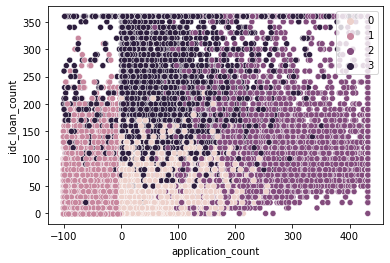

In [ ]:
sns.scatterplot('application_count','idc_loan_count',data=LOG, hue='cluster')
plt.legend(loc='upper right')

In [ ]:
pd.options.display.max_rows = 200

In [ ]:
LOG.groupby('cluster').mean()

In [ ]:
# 실행결과파일 저장
!jupyter nbconvert --to html "/content/drive/MyDrive/2022BigCon/제출파일/문제2_코드정리_제출용.ipynb"